In [1]:
import reg_mri
import os
from glob import glob
from utils import compute_mean_dice
import nibabel as nib
from scipy.spatial.distance import dice
import numpy as np
import itk
import SimpleITK as sitk
import scipy.ndimage
import scipy
import shutil
import scipy.io
import matplotlib.pyplot as plt
from tqdm import tqdm
from transforms_dict import getRegistrationEvalInverseTransformForMRI
import subprocess

In [2]:
output_dir = 'output/Feminad/'
atlas = os.path.join('dataset3', 'Atlas', 'P56_Atlas_128_norm_id.nii.gz')

In [3]:
ants_warps = sorted(glob(os.path.join(output_dir, "ANTS", "DeformableWarp", "*.nii.gz")))
deep_warps = sorted(glob(os.path.join(output_dir, "scenario1", "DeformableWarp", "*.nii.gz")))
for i in range(len(ants_warps)):
    ants_warp = nib.load(ants_warps[i])
    deep_warp = nib.load(deep_warps[i])
    #print(ants_warp.header)
    #print('/'*50)
    #print(deep_warp.header)
    break
    

(128, 128, 128)


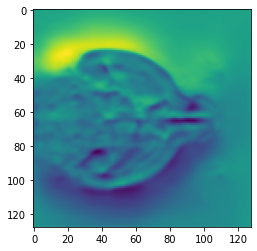

In [15]:
from nilearn import plotting
import matplotlib.pyplot as plt
x = deep_warp.get_fdata()[:,:,:,0,0]
print(x.shape)
plt.imshow(x[:,:,64])

(128, 128, 128)


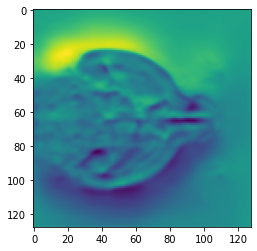

In [17]:
y = nib.as_closest_canonical(deep_warp)
x = y.get_fdata()[:,:,:,0,0]
print(x.shape)
plt.imshow(x[:,:,64])

(128, 128, 128)


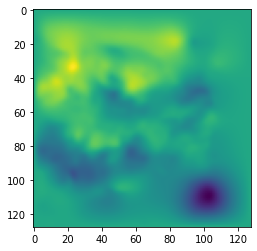

In [16]:
x = ants_warp.get_fdata()[:,:,:,0,0]
print(x.shape)
plt.imshow(x[:,64,:])

(128, 128, 128)


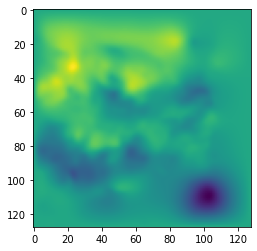

In [18]:
y = nib.as_closest_canonical(ants_warp)
x = y.get_fdata()[:,:,:,0,0]
print(x.shape)
plt.imshow(x[:,:,64])

In [4]:
print(deep_warp)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (128, 128, 128, 1, 3)
affine: 
[[ 1.  0. -0. -0.]
 [ 0.  1. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  5 128 128 128   1   3   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : vector
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 

In [5]:
ants_warps = sorted(glob(os.path.join(output_dir, "ANTS", "DeformableWarp", "*.nii.gz")))
deep_warps = sorted(glob(os.path.join(output_dir, "scenario1", "DeformableWarp", "*.nii.gz")))

In [6]:
ants_warps = sorted(glob(os.path.join(output_dir, "ANTS", "Log10Jacobian_Deformable", "*.nii.gz")))
deep_warps = sorted(glob(os.path.join(output_dir, "scenario1", "Log10Jacobian_Deformable", "*.nii.gz")))
for i in range(len(ants_warps)):
    ants_warp = nib.load(ants_warps[i])
    deep_warp = nib.load(deep_warps[i])
    #print(ants_warp.header)
    #print('/'*50)
    #print(deep_warp.header)
    break

In [7]:
def applyTransformANTS(input, output, atlas, warp):
    cmd = "antsApplyTransforms -d 3 -i " + str(input) + " -o " + str(output) + " -r " + str(atlas) + " -n Linear -t " + str(warp)
    #print(cmd.split(" "))
    subprocess.call(cmd.split(" "))

In [25]:
atlas = os.path.join('dataset3', 'Atlas', 'P56_Atlas_128_norm_id.nii.gz')
input = os.path.join('dataset3', 'Feminad', 'MRI', '2_6516_N4_128_ras_norm_id_affine.nii.gz')

warp_monaiants = os.path.join('output', 'Feminad', 'warp_monai_antsheader.nii.gz')
warp_monaiatlas = os.path.join('output', 'Feminad', 'warp_monai_atlasheader.nii.gz')
warp_monaiants_toants = os.path.join('output', 'Feminad', 'warp_monai_antsheader_toants.nii.gz')
warp_monaiatlas_toants = os.path.join('output', 'Feminad', 'warp_monai_atlasheader_toants.nii.gz')

output_monaiants = os.path.join('output', 'Feminad', 'warped_monaiants.nii.gz')
output_monaiatlas = os.path.join('output', 'Feminad', 'warped_monaiatlas.nii.gz')
output_monaiants_toants = os.path.join('output', 'Feminad', 'warped_monaiants_toants.nii.gz')
output_monaiatlas_toants = os.path.join('output', 'Feminad', 'warped_monaiatlas_toants.nii.gz')

In [42]:
import ants

In [45]:
warp_deep_ants = nib.load("output/Feminad/warp_deep_ants.nii.gz")
warp_ants = nib.load("output/Feminad/warp_ants.nii.gz")
warp_deep_atlas = nib.load("output/Feminad/warp_deep_atlas.nii.gz")

In [ ]:
78,81 => 74,83 (deep) (-,+) (x,z) (réalité) (haut-droite)
78,81 => 84,82 (ants) (+,+) (x,z) (ants) (haut-gauche)

In [51]:
x,y,z = 77,64,80
print(warp_deep_ants.get_fdata()[x,y,z,0,:])
print(warp_ants.get_fdata()[x,y,z,0,:])

[ 1.17369831  2.58459949 -1.73333097]
[2.79029697 2.01424917 0.90658718]


In [ ]:
66,85 => 62,87 (deep) (-,+) (y,z) (réalité) (haut-droite)
66,85 => 69,87 (ants) (-,+) (y,z) (ants) (bas-gauche)
66,85 => 71,82 (ants) (+, -) (y,z) (bas-gauche)

In [53]:
x,y,z = 77,65,84
print(warp_deep_ants.get_fdata()[x,y,z,0,:])
print(warp_ants.get_fdata()[x,y,z,0,:])

[ 1.09151649  2.14753962 -1.65504289]
[2.9833141  2.21918612 2.1147955 ]


In [64]:
ptdr = nib.load("output/Feminad/warp_deep_ants.nii.gz")
lol = ptdr.get_fdata()
lol = lol * [-1, -1, 1]
outwarp = "output/Feminad/warp_1.nii.gz"
ptdr = nib.Nifti1Image(lol, ptdr.affine, ptdr.header)
nib.save(ptdr, outwarp)
applyTransformANTS(input, "output/Feminad/warped_test.nii.gz", atlas, outwarp)